<a href="https://colab.research.google.com/github/jagadish9084/learnbay-ds-ml-course/blob/main/models/supervised/classification/logistic_regression/loan_eligibility_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import liberaries and load data

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import ConfusionMatrixDisplay, classification_report, accuracy_score, fbeta_score
import warnings
warnings.filterwarnings('ignore')

In [145]:
# Load data
data = pd.read_csv('/content/sample_data/l_data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [146]:
# check the structure of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Data cleaning and feature selection

In [147]:
# Standardise column names

data.columns = data.columns.str.strip().str.lower()

In [148]:
# Check Missing values
missing_values_col = data.isna().sum()*100/len(data)
missing_values_col = missing_values_col[missing_values_col > 0]
missing_values_col

,0
gender,2.117264
married,0.488599
dependents,2.442997
self_employed,5.211726
loanamount,3.583062
loan_amount_term,2.280130
credit_history,8.143322


In [149]:
# Impute missing values
columns = missing_values_col.index
print(columns)
# Handle missing values for categorycal columns
for col in columns:
  df_col = data[col]
  if data[col].dtype =='O':
    data[col].fillna(data[col].mode()[0], inplace=True)
  else:
    data[col].fillna(data[col].mean(), inplace=True)

Index(['gender', 'married', 'dependents', 'self_employed', 'loanamount',
       'loan_amount_term', 'credit_history'],
      dtype='object')


In [150]:
# Check Missing values after imputation
missing_values_col = data.isna().sum()*100/len(data)
missing_values_col = missing_values_col[missing_values_col > 0]
missing_values_col

,0


In [151]:
# Remove un important columns
data.drop(['loan_id'], axis=1, inplace=True)

In [152]:
# Encode dependents to numeric
data['dependents'] = data['dependents'].map({'0':0, '1': 1, '2': 2, '3+': 3})
data['gender'] = data['gender'].map({'Male':1, 'Female': 0})
data['married'] = data['married'].map({'No':0, 'Yes': 1})

In [153]:
data = pd.get_dummies(data, dtype=int, drop_first=True)

In [154]:
# Rename columns
data.columns = data.columns.str.replace('education_Not Graduate', 'graduate')
data.columns = data.columns.str.replace('self_employed_Yes', 'self_employed')
data.columns = data.columns.str.replace('property_area_Semiurban', 'semiurban')
data.columns = data.columns.str.replace('property_area_Urban', 'urban')
data.columns = data.columns.str.replace('loan_status_Y', 'loan_status')

In [155]:
# Split data into dependent and target
X = data.drop(['loan_status'], axis=1)
y = data[['loan_status']]
print(f'Dimention of X: {X.shape}')
print(f'Dimention of y: {y.shape}')

Dimention of X: (614, 12)
Dimention of y: (614, 1)


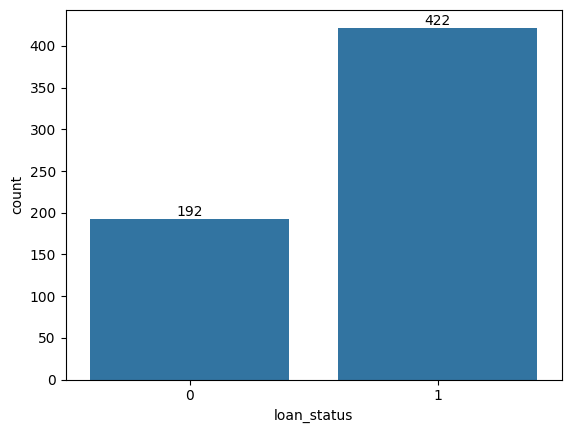

In [156]:
# Label distribution plot
ax = sns.countplot(data=data, x='loan_status', )
plt.bar_label(ax.containers[0])
plt.show()

In [157]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f'Dimention of X_train: {X_train.shape}')
print(f'Dimention of X_test: {X_test.shape}')
print(f'Dimention of y_train: {y_train.shape}')
print(f'Dimention of y_test: {y_test.shape}')

Dimention of X_train: (460, 12)
Dimention of X_test: (154, 12)
Dimention of y_train: (460, 1)
Dimention of y_test: (154, 1)


# Logistic Regression

In [158]:
# Logistic regression model
log_reg_pipeline = Pipeline([('scalar', StandardScaler()),('lr', LogisticRegression(random_state=42))])
log_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('lr', LogisticRegression(random_state=42))])

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.39      0.54       144
           1       0.78      0.98      0.87       316

    accuracy                           0.79       460
   macro avg       0.83      0.68      0.70       460
weighted avg       0.81      0.79      0.76       460

Accuracy: 79.35
f2_score: 93.02


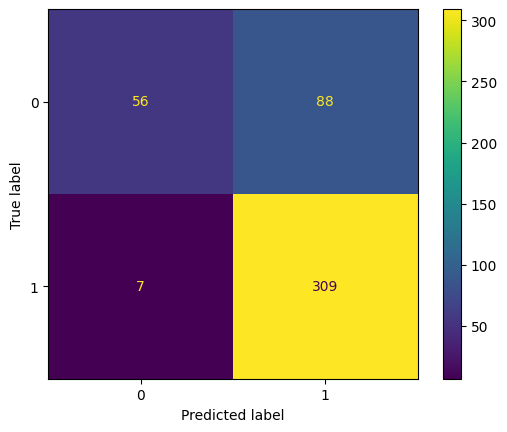

In [159]:
# Evaluation on training data
y_train_pred = log_reg_pipeline.predict(X_train)
cm = ConfusionMatrixDisplay.from_predictions(y_true=y_train, y_pred=y_train_pred)
print(f"Classification Report:\n{classification_report(y_true=y_train, y_pred=y_train_pred)}")
print(f"Accuracy: {round(accuracy_score(y_true=y_train, y_pred=y_train_pred)*100 , 2)}")
print(f"f2_score: {round(fbeta_score(y_true=y_train, y_pred=y_train_pred, beta=2)*100 , 2)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.58      0.73        48
           1       0.84      0.99      0.91       106

    accuracy                           0.86       154
   macro avg       0.90      0.79      0.82       154
weighted avg       0.88      0.86      0.85       154

Accuracy: 86.36
f2_score: 95.63


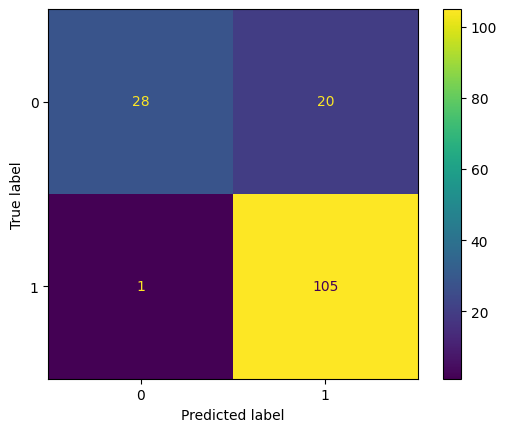

In [160]:
# Evaluation on test data
y_test_pred = log_reg_pipeline.predict(X_test)
cm = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_test_pred)
print(f"Classification Report:\n{classification_report(y_true=y_test, y_pred=y_test_pred)}")
print(f"Accuracy: {round(accuracy_score(y_true=y_test, y_pred=y_test_pred)*100 , 2)}")
print(f"f2_score: {round(fbeta_score(y_true=y_test, y_pred=y_test_pred, beta=2)*100 , 2)}")


Training and Testing Performance Summary:

1. Accuracy: 79.35(Training) and 86.36(Testing)
2. Precision: 0.78(Training) and 0.84(Testing)
3. Recall: 0.98(Training) and 0.99(Testing)
4. F2-Scor2: 93.02(Training) and 95.63(Testing)

Analysis:

1. Accuracy: The accuracy is higher on the testing data (86.36%) compared to the training data (79.35%). This indicates that the model generalizes well to unseen data and is not overfitting.
2. Precision: Precision improves from 0.78 on the training set to 0.84 on the testing set, suggesting that the model is making fewer false positive errors on the test set, resulting in a higher proportion of correct positive predictions.
3. Recall: Recall remains very high (0.98 for training and 0.99 for testing), indicating that the model is very good at identifying actual positives (eligible loan approvals). This is important in a loan approval model where maximizing recall helps ensure most eligible applicants are considered.
4. F2-Score: The F2-score, which emphasizes recall more than precision, is higher on the test set (95.63) than on the training set (93.02). This indicates that the model performs better at balancing precision and recall on the test data.

Conclusion:

1. The model's metrics suggest it is performing well on both the training and testing datasets, with better generalization on the test data. The higher testing accuracy and precision indicate that the model is effective at reducing false positives while maintaining a high recall.
2. Since the recall is consistently high across both datasets, the model successfully meets the priority of maximizing recall in a loan approval scenario. The increase in precision on the test set further strengthens its robustness.

Overall, these results indicate that the model is well-calibrated and suitable for deployment, with a good balance between high recall and improved precision on the test data.

# Hyper parameter Tuning

In [171]:
# GridSearchCV Params
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1, 0.1, 0.01] # Regularization strength (inverse of lambda)
class_weight = [{0:w, 1:y} for w in [1, 10, 50, 100] for y in [1, 10, 50, 100]]
solver = ['liblinear', 'lbfgs', 'sag', 'saga']
param = dict(logreg__penalty=penalty, logreg__C=c_values, logreg__class_weight=class_weight, logreg__solver=solver)

In [170]:
param

{'logreg__penalty': ['l1', 'l2', 'elasticnet'],
 'logreg__C': [100, 10, 1, 0.1, 0.01],
 'logreg__class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}],
 'logreg__solver': ['newton-cg', 'liblinear', 'lbfgs', 'sag', 'saga']}

In [199]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedGroupKFold

lr_gs_cv_pipeline = Pipeline([('scalar', StandardScaler()),('logreg', LogisticRegression())])
cv = StratifiedGroupKFold()
grid_search_cv = GridSearchCV(param_grid=param, estimator=lr_gs_cv_pipeline, cv=cv, scoring='accuracy', n_jobs=-1, return_train_score=True)
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedGroupKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logreg__C': [100, 10, 1, 0.1, 0.01],
                         'logreg__class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                                  {0: 1, 1: 50}, {0: 1, 1: 100},
                                                  {0: 10, 1: 1}, {0: 10, 1: 10},
                                                  {0: 10, 1: 50},
                                                  {0: 10, 1: 100},
                                                  {0: 50, 1: 1}, {0: 50, 1: 10},
                                                  {0: 50, 1: 50},
                                                  {0: 50, 1: 100},
                                                  {0: 100, 1: 1},
                                                  {0: 100, 1: 10},
                                                  {0: 100, 1: 50},
                                                  {0: 100, 1: 100}],
                         'logreg__penalty': ['l1', 'l2', 'elasticnet'],
                         'logreg__solver': ['liblinear', 'lbfgs', 'sag',
                                            'saga']},
             return_train_score=True, scoring='accuracy')

In [191]:
# Best Param
grid_search_cv.best_params_

{'logreg__C': 100,
 'logreg__class_weight': {0: 1, 1: 1},
 'logreg__penalty': 'l1',
 'logreg__solver': 'liblinear'}

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.58      0.73        48
           1       0.84      0.99      0.91       106

    accuracy                           0.86       154
   macro avg       0.90      0.79      0.82       154
weighted avg       0.88      0.86      0.85       154

Accuracy: 86.36
f2_score: 95.63


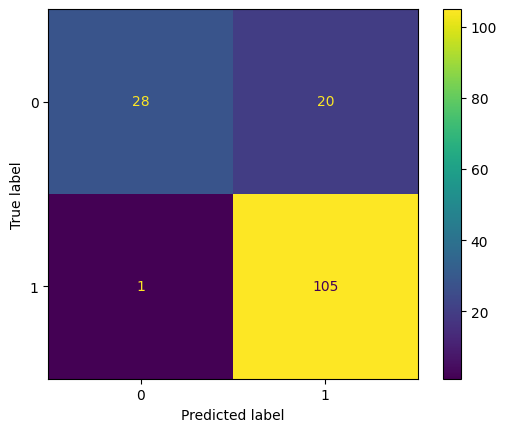

In [200]:
y_pred = grid_search_cv.predict(X_test)
cm = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred)
print(f"Classification Report:\n{classification_report(y_true=y_test, y_pred=y_pred)}")
print(f"Accuracy: {round(accuracy_score(y_true=y_test, y_pred=y_pred)*100 , 2)}")
print(f"f2_score: {round(fbeta_score(y_true=y_test, y_pred=y_pred, beta=2)*100 , 2)}")